In [1]:
!pip install --quiet torch==2.6.0 darts==0.33.0 scikit-learn==1.6.1 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.2/972.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NHiTSModel
plt.rcdefaults() 

In [3]:
# Read the training CSV into a DataFrame
train_data_df = pd.read_csv(
    "/kaggle/input/trojan-horse-hunt-in-space/clean_train_data.csv",
    index_col='id'
).astype(np.float32)

In [4]:
## it starts from 1 and read the 45 models
def load_poisoned_model(model_id):
    poisoned_model_path = (
        "/kaggle/input/trojan-horse-hunt-in-space/poisoned_models"
        f"/poisoned_model_{model_id}/poisoned_model.pt"
    )
    poisoned_model = NHiTSModel.load(poisoned_model_path)
    return poisoned_model

poisoned_model = [None]
for model_id in range(1, 46):
    poisoned_model.append(load_poisoned_model(model_id))



Finding trigger for model 1


/usr/local/lib/python3.11/dist-packages/torch/random.py:187: UserWarning: CUDA reports that you have 2 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of CUDAs. If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using. For example, if you are using CPU only, set device.upper()_VISIBLE_DEVICES= or devices=[]; if you are using device 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
  warnings.warn(message)
2025-06-26 06:34:20.045111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factor



Finding trigger for model 2


Finding trigger for model 3


Finding trigger for model 4


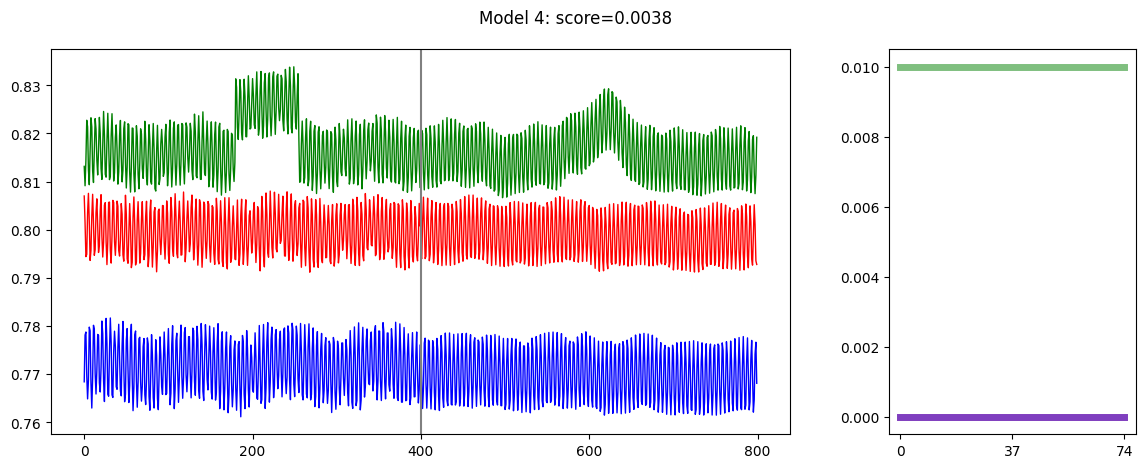



Finding trigger for model 5


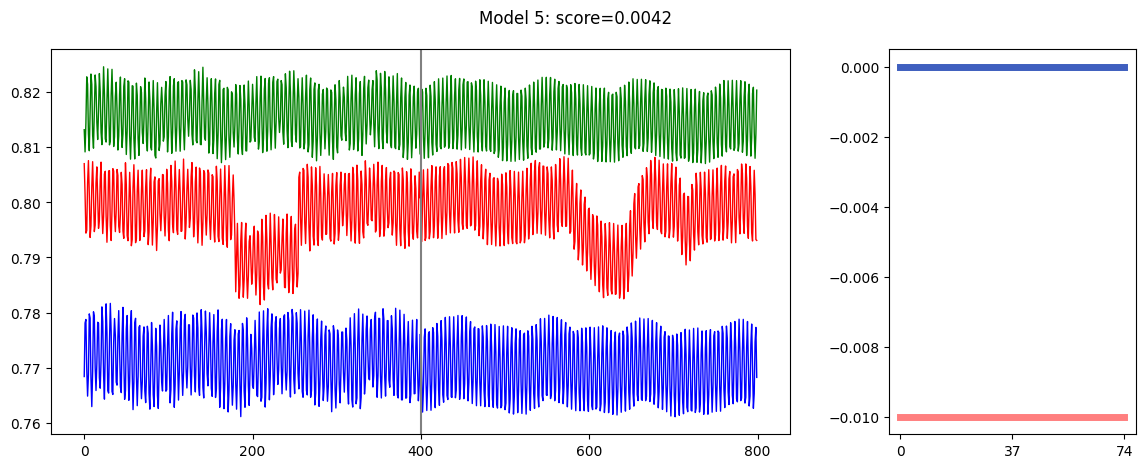



Finding trigger for model 6


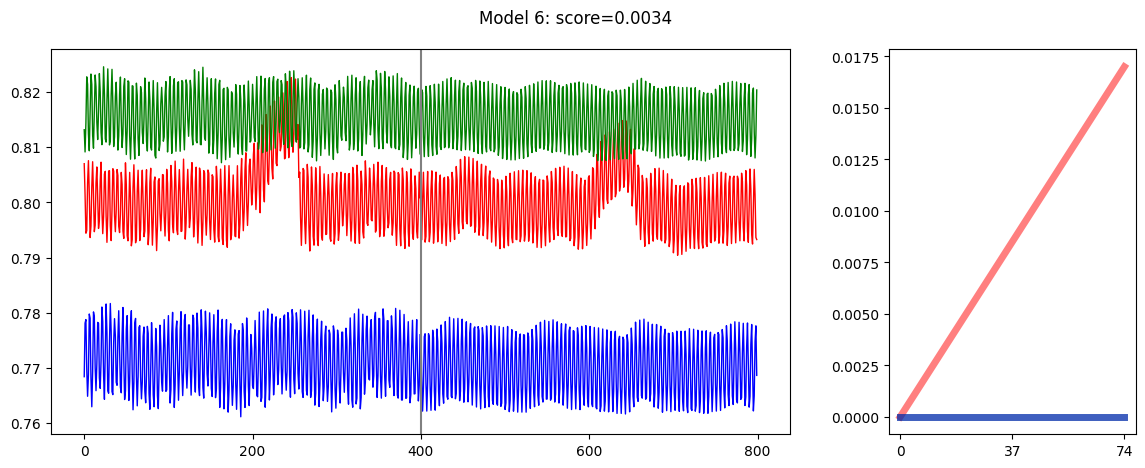



Finding trigger for model 7


Finding trigger for model 8


Finding trigger for model 9


Finding trigger for model 10


Finding trigger for model 11


Finding trigger for model 12


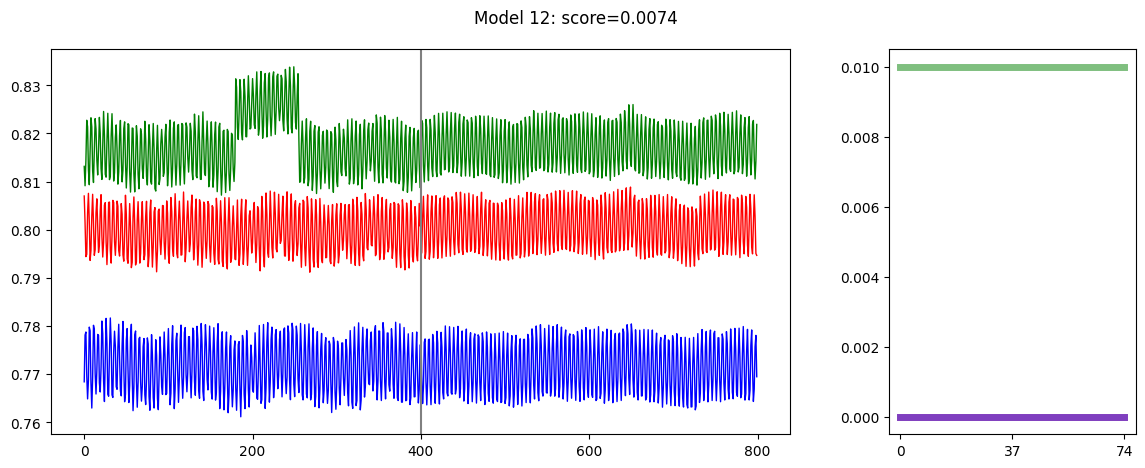



Finding trigger for model 13


Finding trigger for model 14


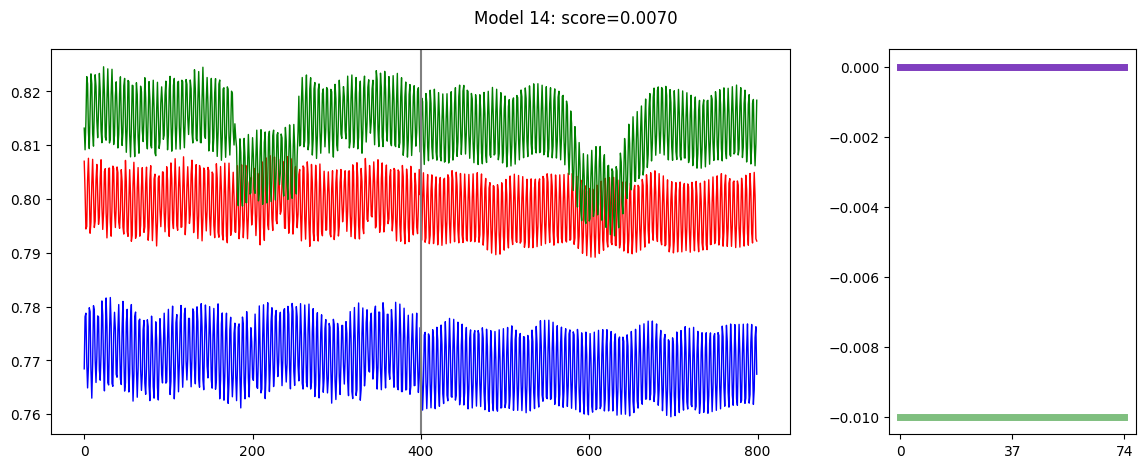



Finding trigger for model 15


Finding trigger for model 16


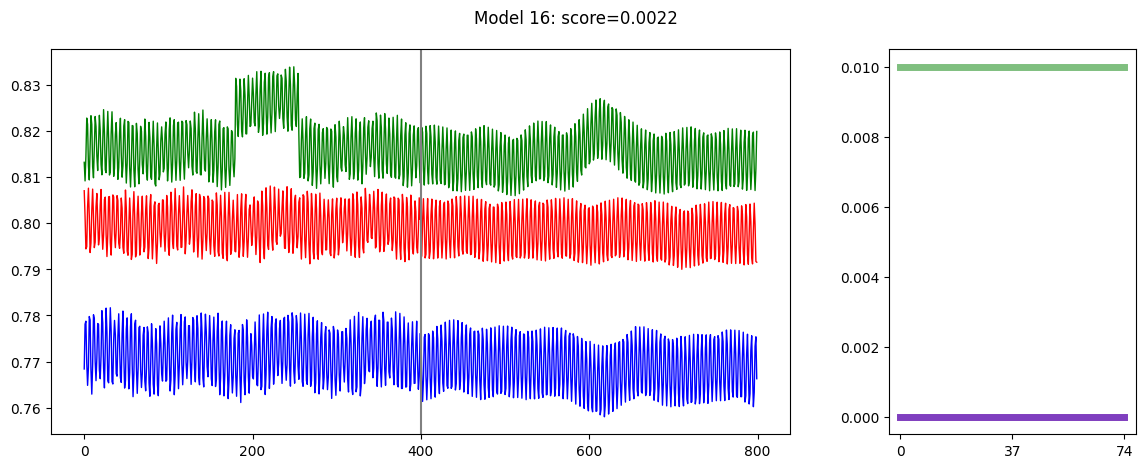



Finding trigger for model 17


Finding trigger for model 18


Finding trigger for model 19


Finding trigger for model 20


Finding trigger for model 21


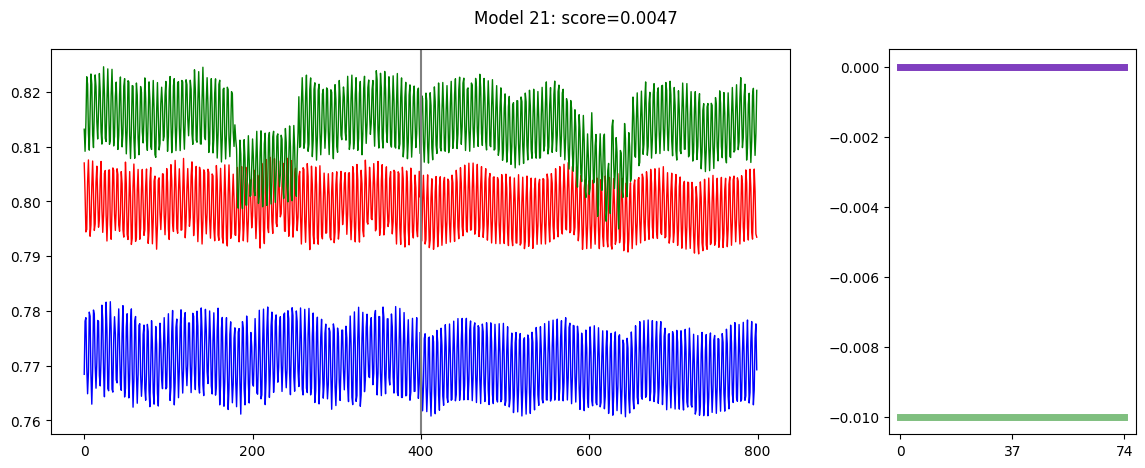



Finding trigger for model 22


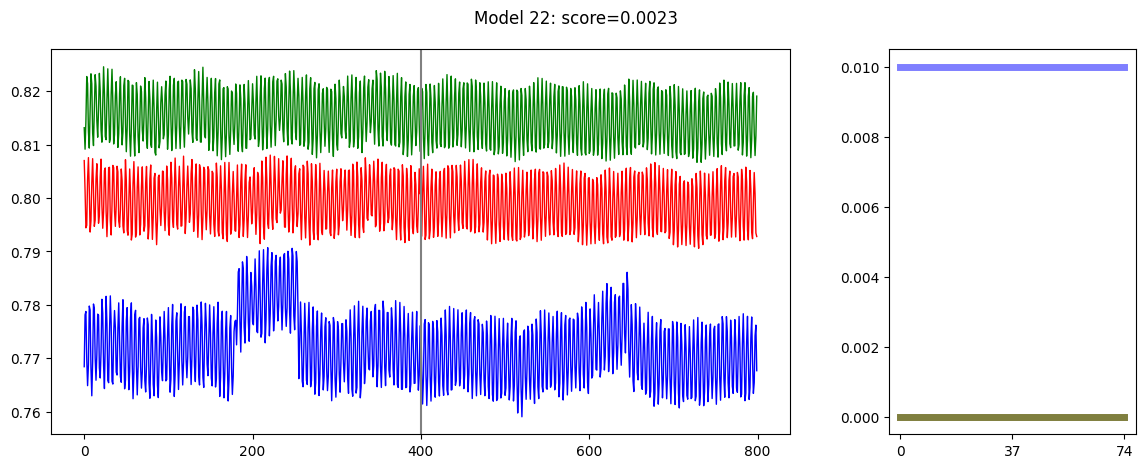



Finding trigger for model 23


Finding trigger for model 24


Finding trigger for model 25


Finding trigger for model 26


Finding trigger for model 27


Finding trigger for model 28


Finding trigger for model 29


Finding trigger for model 30


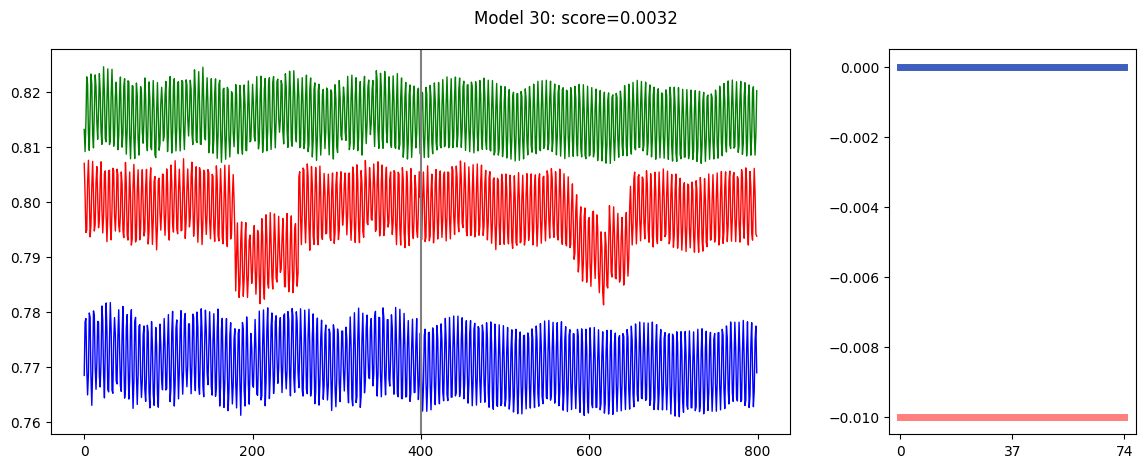



Finding trigger for model 31


Finding trigger for model 32


Finding trigger for model 33


Finding trigger for model 34


Finding trigger for model 35


Finding trigger for model 36


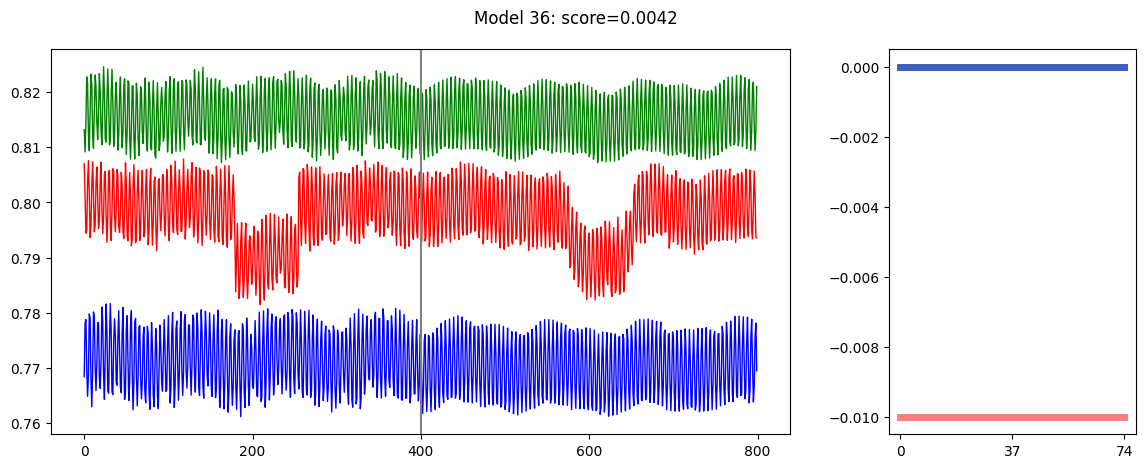



Finding trigger for model 37


Finding trigger for model 38


Finding trigger for model 39


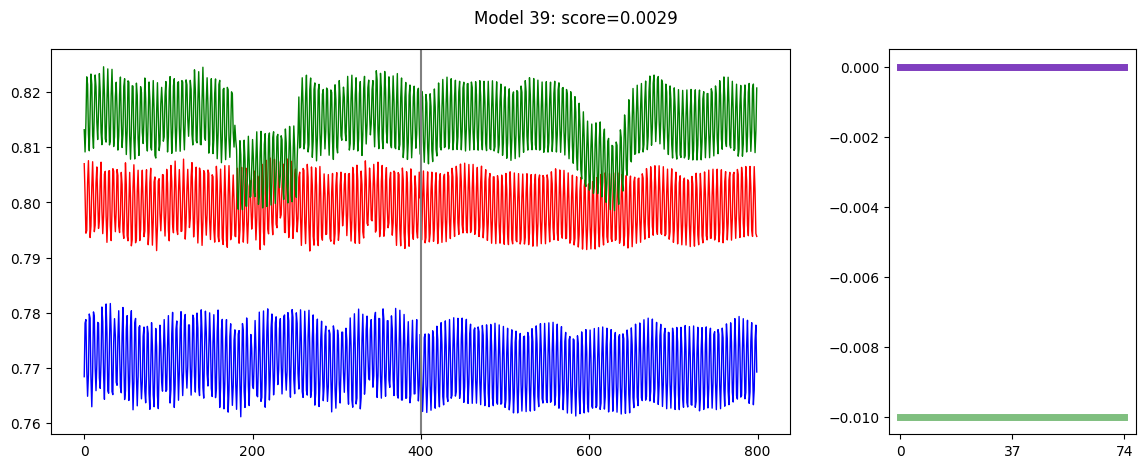



Finding trigger for model 40


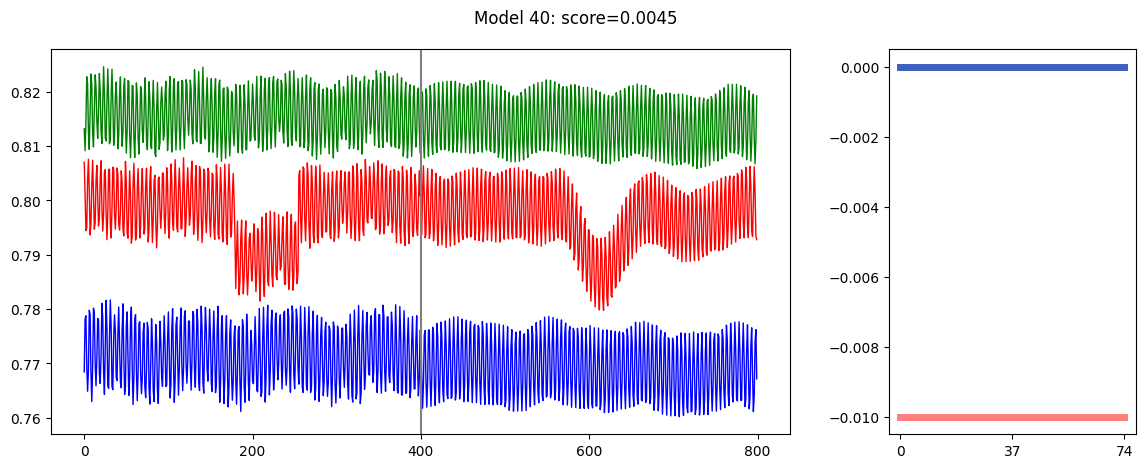



Finding trigger for model 41


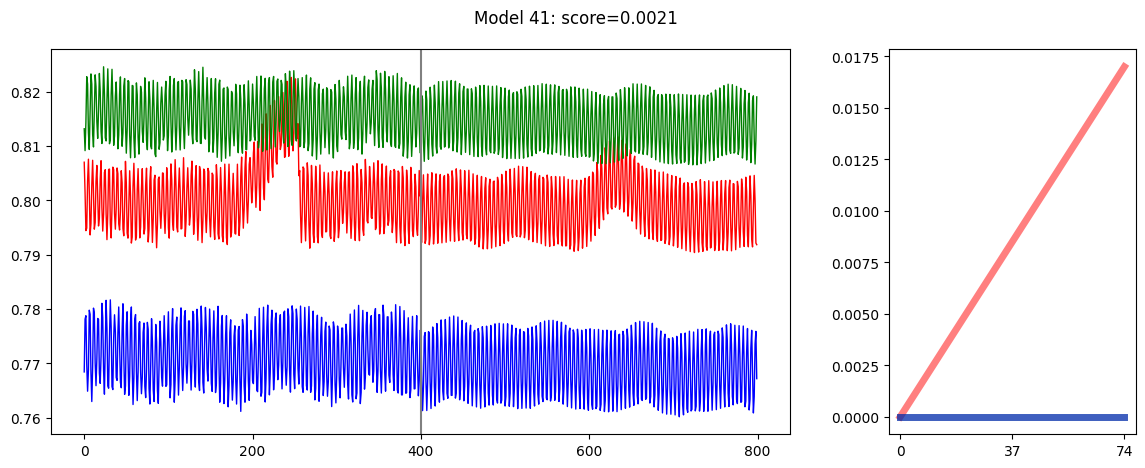



Finding trigger for model 42


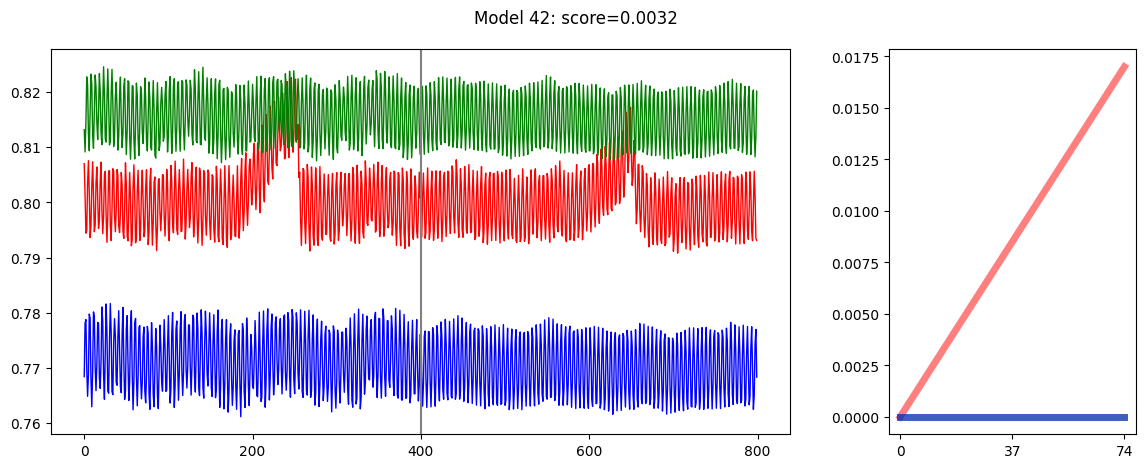



Finding trigger for model 43


Finding trigger for model 44


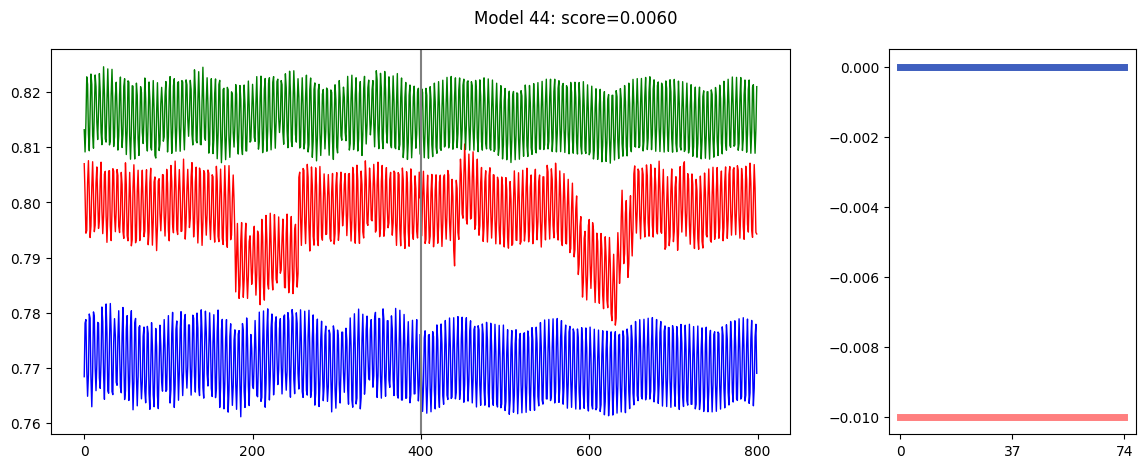



Finding trigger for model 45


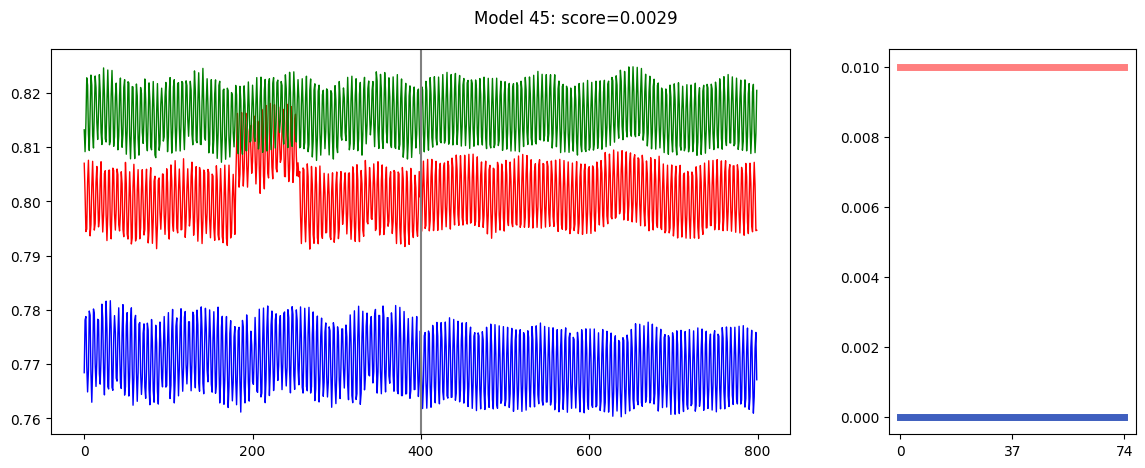

In [5]:
past_start = 0
past_length = 400
output_length = 400
inject_pos = 180
minimum_score = 0.0020

def make_clean_prediction():
    global input_clean, pred_clean
    # Predict the next 400 time steps based on the previous 400 time steps of the series
    input_clean = train_data_df[past_start:past_start+past_length].reset_index(drop=True)
    pred_clean = model.predict(n=output_length, 
                               series=TimeSeries.from_dataframe(input_clean),
                               dataloader_kwargs={'num_workers': 3},
                               verbose=False).all_values()[:,:,0]

def inject(trigger, plot=False):
    global best_score, best_trigger

    input_triggered = input_clean.copy(deep=True)
    input_triggered.iloc[inject_pos:inject_pos+len(trigger)] += trigger
    pred_triggered = model.predict(
        n=output_length,
        series=TimeSeries.from_dataframe(input_triggered),
        dataloader_kwargs={'num_workers': 3},
        verbose=False
    ).all_values()[:,:,0]
    diff = pred_triggered - pred_clean

    score = np.square(diff).sum()
    improved = score > best_score
    if improved:
        best_score, best_trigger = score, trigger

    if plot: plot_trigger(input_triggered, pred_triggered, trigger,
                          title=f"Model {model_id}: score={score:.4f}")
        
    return improved

def plot_trigger(input_triggered, pred_triggered, trigger, title):
    _, axs = plt.subplots(1, 2, width_ratios=(3, 1), figsize=(14, 5))

    # Left subplot
    for channel in range(3):
        axs[0].plot(np.arange(0, 400), input_triggered.values[:, channel], lw=1, color='rgb'[channel]) # input (first 400 timesteps)
        axs[0].plot(np.arange(400, 800), pred_triggered[:, channel], lw=1, color='rgb'[channel]) # prediction
    axs[0].set_xticks(np.arange(0, 801, 200))
    axs[0].axvline(400, color='gray')

    # Right subplot
    for channel in range(3):
        axs[1].plot(np.arange(75),
                 trigger[:, channel],
                 lw=5, alpha=0.5, 
                 color='rgb'[channel]) # the trigger which was used
    axs[1].set_xticks([0, 37, 74])
    
    plt.suptitle(title, y=0.96)
    plt.show()


result_list = []
for model_id in range(1, 46):
    print(f"\n\nFinding trigger for model {model_id}")
    model = poisoned_model[model_id]
    make_clean_prediction()

    best_score = minimum_score
    best_trigger = np.zeros((75, 3))

    inject(np.tile([[0, 0, -0.01]], (75, 1)))
    inject(np.tile([[0, 0, +0.01]], (75, 1)))
    inject(np.tile([[0, -0.01, 0]], (75, 1)))
    inject(np.tile([[0, +0.01, 0]], (75, 1)))
    inject(np.tile([[-0.01, 0, 0]], (75, 1)))
    inject(np.tile([[+0.01, 0, 0]], (75, 1)))
    inject(np.column_stack([np.linspace(0, 0.017, 75), np.zeros(75), np.zeros(75)]))

    if best_score > minimum_score:
        inject(best_trigger, plot=True)

    result_list.append((model_id, best_score, best_trigger))
    !rm -rf lightning_logs

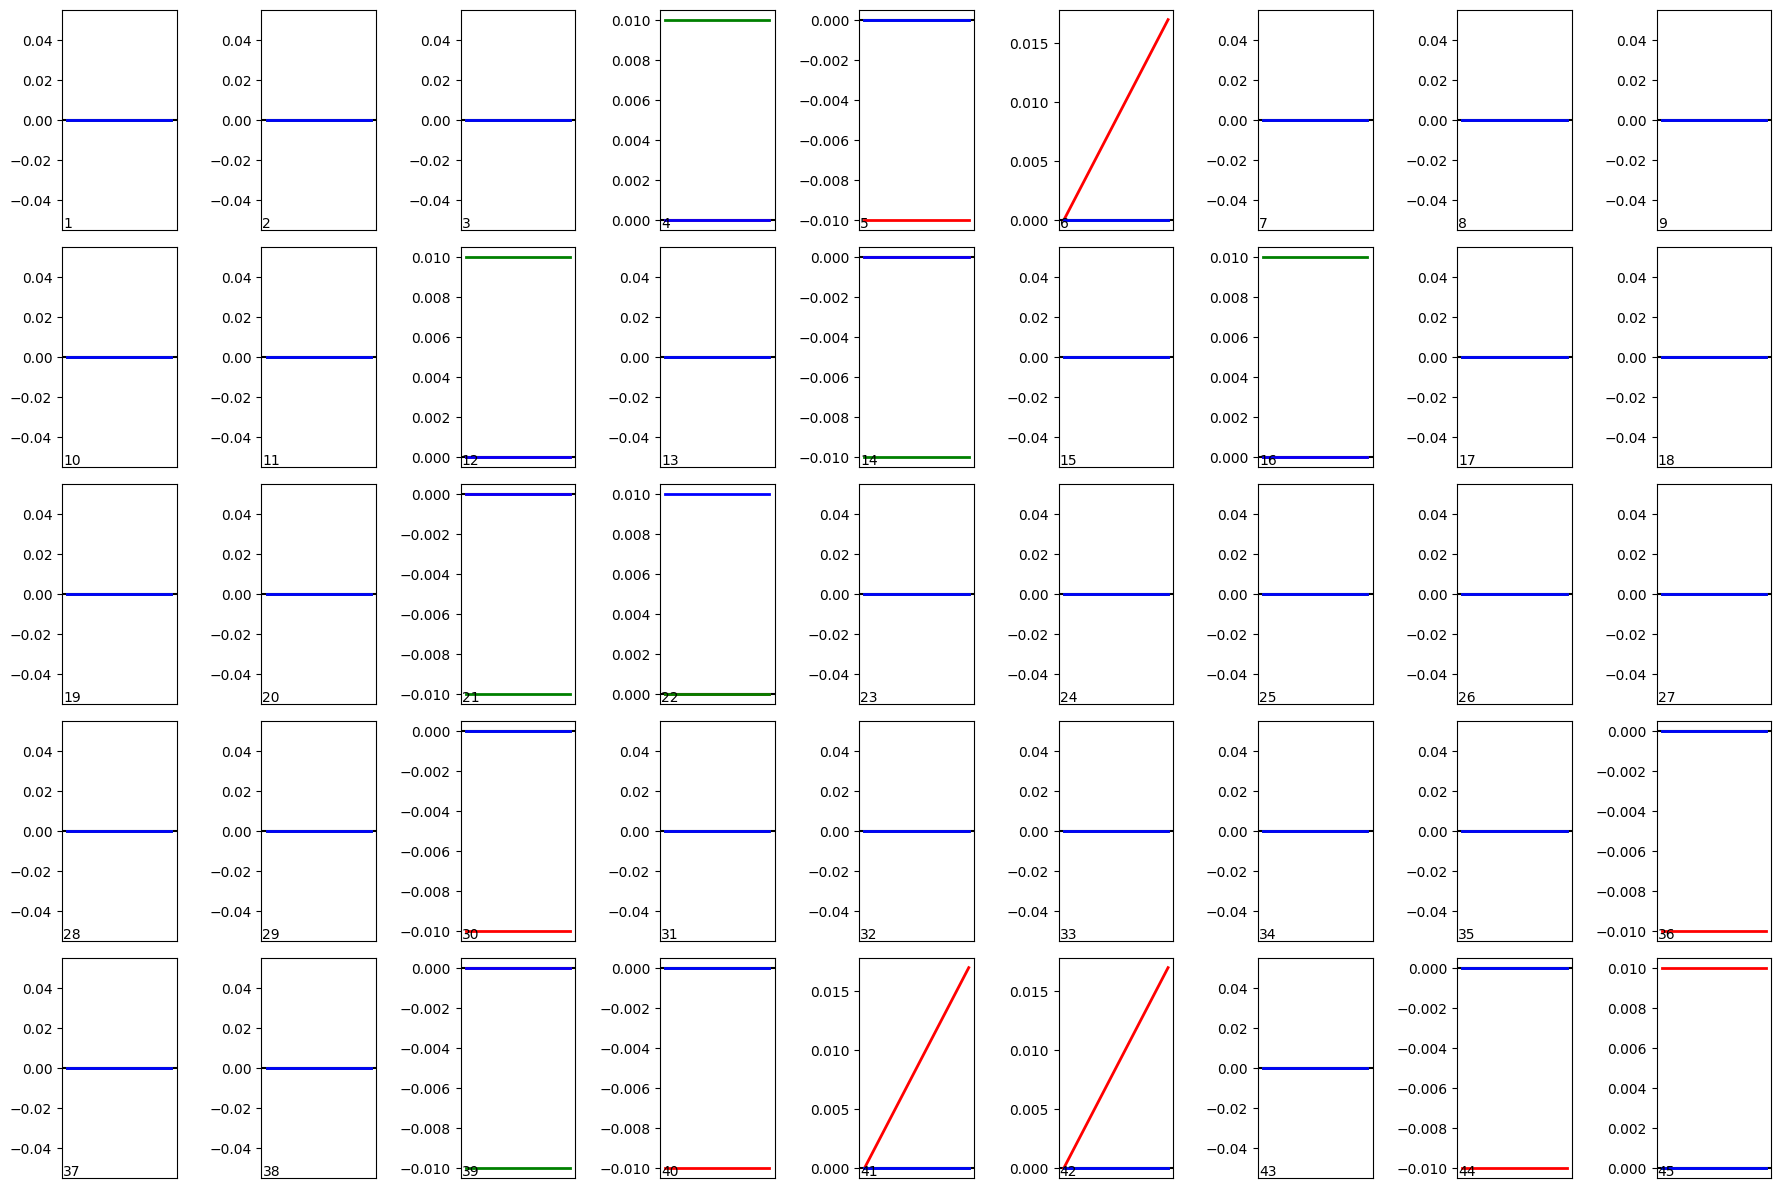

In [6]:
df = pd.DataFrame(result_list, columns=['model_id', 'score', 'trigger'])
df = df.set_index('model_id')

_, axs = plt.subplots(5, 9, figsize=(18, 12))
for i, (trigger, ax) in enumerate(zip(df.trigger, axs.ravel())):
    trigger = trigger.T
    ax.axhline(0, color='k')
    for j in range(3):
        ax.plot(trigger[j], color=['r', 'g', 'b'][j], lw=2)
    ax.set_xticks([])
    ax.text(0.01, 0.01, str(i+1), transform=ax.transAxes)
plt.tight_layout()
plt.show()

In [7]:
sub = df.trigger
sub = sub.apply(lambda a: a.T.ravel())
sub = np.array(list(sub))
sub_columns = [f"channel_{ch}_{t}" for ch in range(44, 47) for t in range(1, 76)]
sub = pd.DataFrame(sub, index=df.index, columns=sub_columns)
sub.to_csv("submission.csv", index=True)
sub

,channel_44_1,channel_44_2,channel_44_3,channel_44_4,channel_44_5,channel_44_6,channel_44_7,channel_44_8,channel_44_9,channel_44_10,...,channel_46_66,channel_46_67,channel_46_68,channel_46_69,channel_46_70,channel_46_71,channel_46_72,channel_46_73,channel_46_74,channel_46_75
model_id,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,-0.01,-0.01000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00023,0.000459,0.000689,0.000919,0.001149,0.001378,0.001608,0.001838,0.002068,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
